In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import scipy as sc
import sympy as sp
#%matplotlib widget
import serial,socket,os,glob,sys
#import atexit
import numpy as np
import pandas as pd
import time, threading,sys,glob
from ipywidgets import interact, interact_manual,interactive,widgets,Layout
colores = (plt.rcParams['axes.prop_cycle'].by_key()['color'])
import tifffile as tif
import skimage as sk
from IPython.display import Latex
from funciones_wake import *
from scipy.signal import find_peaks
mks = ['s','o','>','p','v','^','*']
%load_ext autoreload
%autoreload 2

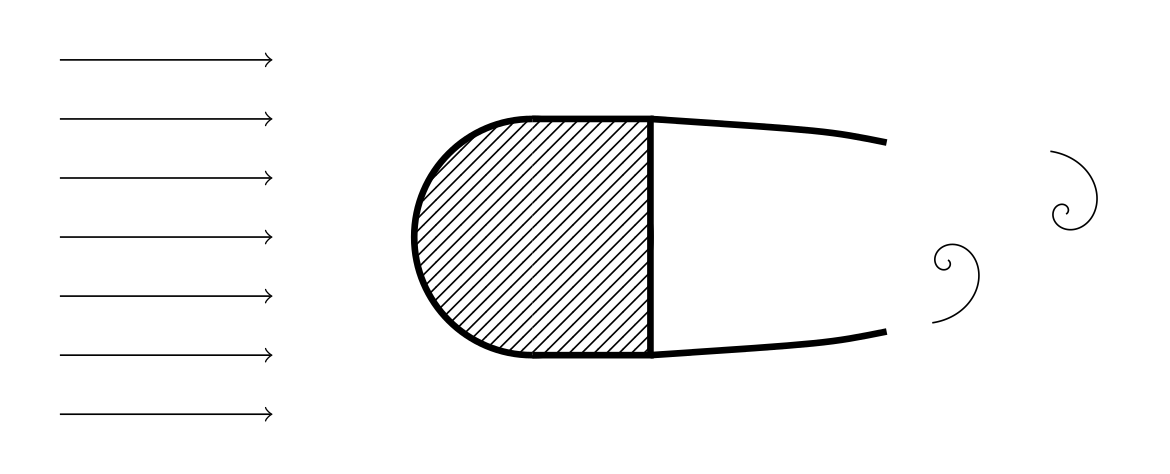

In [2]:
if __name__ == "__main__":
    file_name = "medidas/Dshape_e00_L000_deltaV0_0"
    modified_date = get_modified_date(file_name)
    print(modified_date[1])

1724939542.2217321


In [3]:
beta_nL(0),freq_elast(beta_nL(0),5e-2,45e-5,1300,75)

(1.8751040687120684, 15.206694613354841)

In [4]:
rho = 1.2
Lspan= 35e-2
D = 5e-2
Sf = Lspan*D
nu = 15e-6

In [46]:
lista_soporte = np.sort(glob.glob('medidas/Dshape_soporte_V*'))
caso_soporte = caso_drag(lista_soporte)
lista_referencia = np.sort(glob.glob('medidas/Dshape_e00*'))
caso_referencia = caso_drag(lista_referencia)
lista_e50_L075 = np.sort(glob.glob('medidas/Dshape_e50_L075*'))
caso_e50_L075 = caso_drag(lista_e50_L075)
lista_e50_L100 = np.sort(glob.glob('medidas/Dshape_e50_L100*'))
caso_e50_L100 = caso_drag(lista_e50_L100)
lista_e50_L125 = np.sort(glob.glob('medidas/Dshape_e50_L125*'))
caso_e50_L125 = caso_drag(lista_e50_L125)
lista_e50_L150 = np.sort(glob.glob('medidas/Dshape_e50_L150*'))
caso_e50_L150 = caso_drag(lista_e50_L150)



lista_e75_L075 = np.sort(glob.glob('medidas/Dshape_e75_L075*'))
caso_e75_L075 = caso_drag(lista_e75_L075)
lista_e75_L100 = np.sort(glob.glob('medidas/Dshape_e75_L100*'))
caso_e75_L100 = caso_drag(lista_e75_L100)
lista_e75_L125 = np.sort(glob.glob('medidas/Dshape_e75_L125*'))
caso_e75_L125 = caso_drag(lista_e75_L125)
lista_e75_L150 = np.sort(glob.glob('medidas/Dshape_e75_L150*'))
caso_e75_L150 = caso_drag(lista_e75_L150)


lista_e1000_L075 = np.sort(glob.glob('medidas/Dshape_e1000_L075*'))
caso_e1000_L075 = caso_drag(lista_e1000_L075)
lista_e1000_L100 = np.sort(glob.glob('medidas/Dshape_e1000_L100*'))
caso_e1000_L100 = caso_drag(lista_e1000_L100)
lista_e1000_L125 = np.sort(glob.glob('medidas/Dshape_e1000_L125*'))
caso_e1000_L125 = caso_drag(lista_e1000_L125)
lista_e1000_L150 = np.sort(glob.glob('medidas/Dshape_e1000_L150*'))
caso_e1000_L150 = caso_drag(lista_e1000_L150)




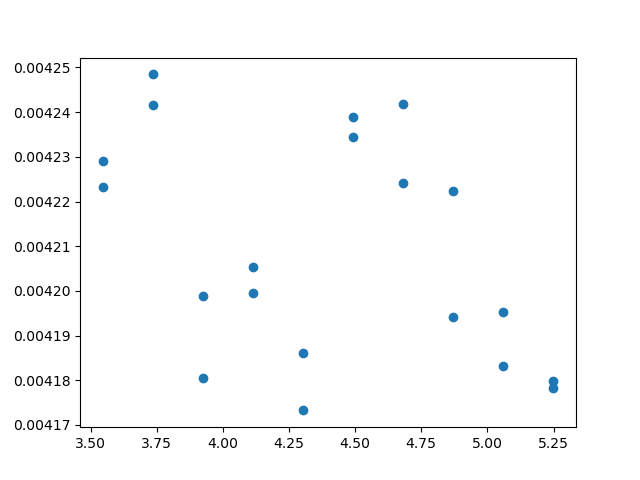

In [47]:
fig,ax = plt.subplots()

FD_s = caso_soporte.df['FD_m'][caso_soporte.index_casos]
U_s = caso_soporte.df['velocity'][caso_soporte.index_casos]
ax.plot(U_s,FD_s/U_s**2,'o')
#ax.set_ylim([0,2])




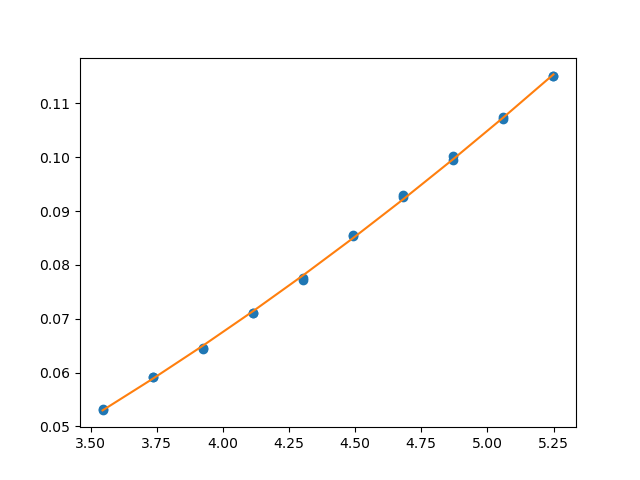

In [48]:
fig,ax = plt.subplots()

FD_s_soporte = caso_soporte.df['FD_m'][caso_soporte.index_casos]
U_s_soporte = caso_soporte.df['velocity'][caso_soporte.index_casos]

p1_soporte = np.polyfit(U_s_soporte,FD_s_soporte,2)
F_soporte = np.poly1d(p1_soporte)

ax.plot(U_s_soporte,FD_s_soporte,'o')
ax.plot(U_s_soporte,F_soporte(U_s_soporte))
#ax.set_ylim([0,2])

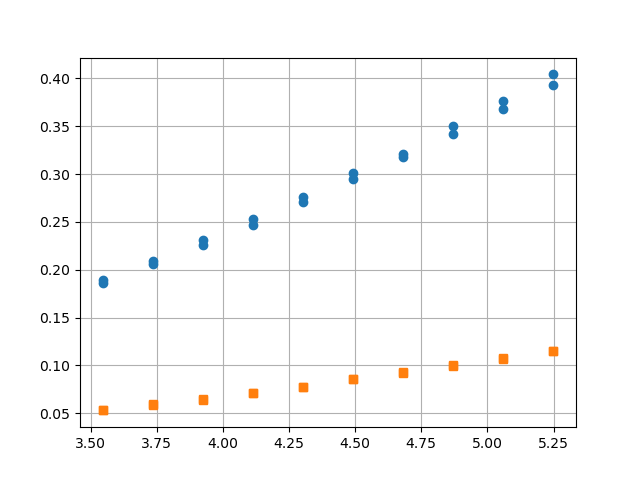

In [49]:
fig,ax = plt.subplots()

FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
ax.plot(U_s_referencia,FD_s_referencia,'o')
ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()

Text(0.5, 0, 'Re')

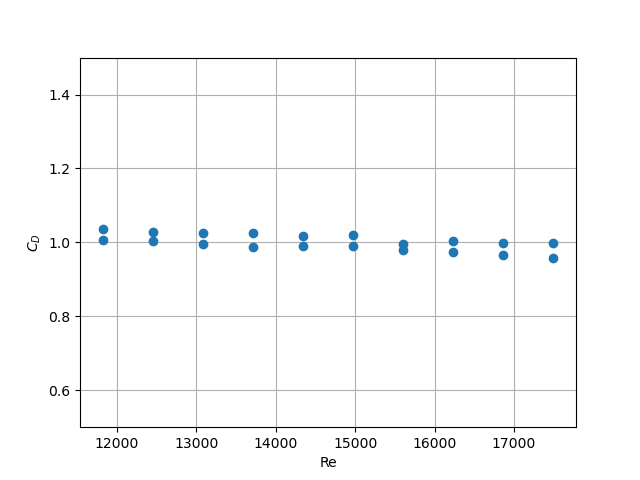

In [50]:
fig,ax = plt.subplots()

FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
FD_0 =  FD_s_referencia-F_soporte(U_s_referencia)
ax.plot(U_s_referencia*D/nu,FD_0/U_s_referencia**2/Sf/rho/0.5,'o')
#ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()
ax.set_ylim([0.5,1.5])
ax.set_ylabel('$C_D$')
ax.set_xlabel('Re')

In [11]:
fr_strouhal_s

array([12.72636318, 12.64632316, 13.32666333, 13.24662331, 13.96698349,
       13.84692346, 14.56728364, 14.44722361, 15.16758379, 15.08754377,
       15.84792396, 15.64782391, 16.4082041 , 16.20810405, 17.08854427,
       16.84842421, 17.68884442, 17.44872436, 18.36918459, 18.04902451])

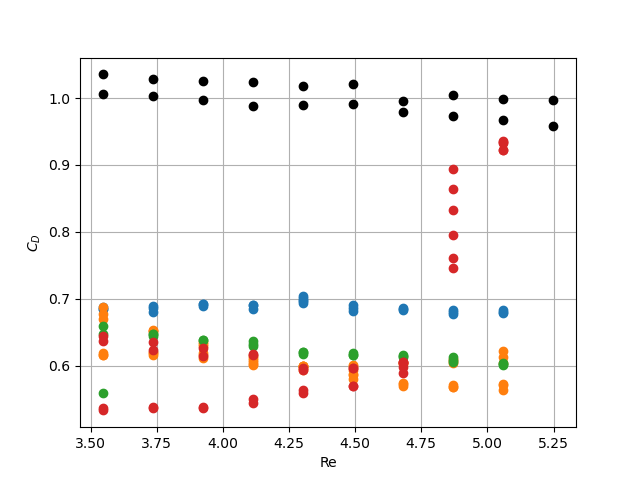

In [52]:
fig,ax = plt.subplots()


FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
FD_0 =  FD_s_referencia-F_soporte(U_s_referencia)
ax.plot(U_s_referencia,FD_0/U_s_referencia**2/Sf/rho/0.5,'ko')

FD_s_e50_L075 = caso_e50_L075.df['FD_m'][caso_e50_L075.index_casos]
U_s_e50_L075 = caso_e50_L075.df['velocity'][caso_e50_L075.index_casos]
FD_0 =  FD_s_e50_L075-F_soporte(U_s_e50_L075)
#ax.plot(U_s_e50_L075*D/nu,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e50_L075,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')


FD_s_e50_L100 = caso_e50_L100.df['FD_m'][caso_e50_L100.index_casos]
U_s_e50_L100 = caso_e50_L100.df['velocity'][caso_e50_L100.index_casos]
FD_0 =  FD_s_e50_L100-F_soporte(U_s_e50_L100)
#ax.plot(U_s_e50_L075*D/nu,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e50_L100,FD_0/U_s_e50_L100**2/Sf/rho/0.5,'o')
#ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()
#ax.set_ylim([0.25,1.])
ax.set_ylabel('$C_D$')
ax.set_xlabel('Re');


FD_s_e50_L125 = caso_e50_L125.df['FD_m'][caso_e50_L125.index_casos]
U_s_e50_L125 = caso_e50_L125.df['velocity'][caso_e50_L125.index_casos]
FD_0 =  FD_s_e50_L125-F_soporte(U_s_e50_L125)
#ax.plot(U_s_e50_L075*D/nu,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e50_L125,FD_0/U_s_e50_L125**2/Sf/rho/0.5,'o')

FD_s_e50_L150 = caso_e50_L150.df['FD_m'][caso_e50_L150.index_casos]
U_s_e50_L150 = caso_e50_L150.df['velocity'][caso_e50_L150.index_casos]
FD_0 =  FD_s_e50_L150-F_soporte(U_s_e50_L150)
#ax.plot(U_s_e50_L075*D/nu,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e50_L150,FD_0/U_s_e50_L150**2/Sf/rho/0.5,'o')

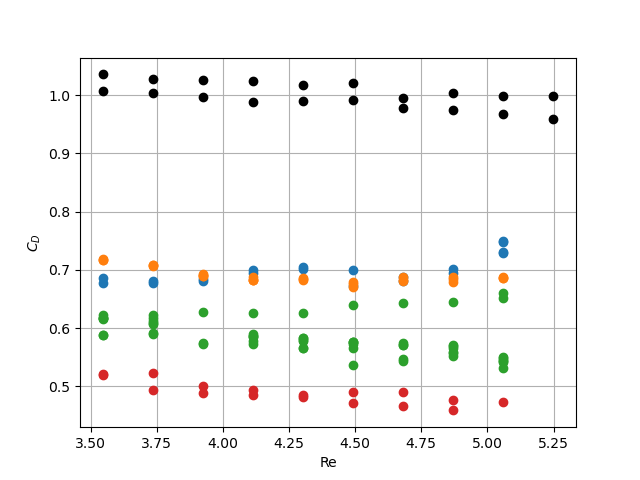

In [53]:
fig,ax = plt.subplots()


FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
FD_0 =  FD_s_referencia-F_soporte(U_s_referencia)
ax.plot(U_s_referencia,FD_0/U_s_referencia**2/Sf/rho/0.5,'ko')

FD_s_e75_L075 = caso_e75_L075.df['FD_m'][caso_e75_L075.index_casos]
U_s_e75_L075 = caso_e75_L075.df['velocity'][caso_e75_L075.index_casos]
FD_0 =  FD_s_e75_L075-F_soporte(U_s_e75_L075)
#ax.plot(U_s_e75_L075*D/nu,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e75_L075,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')


FD_s_e75_L100 = caso_e75_L100.df['FD_m'][caso_e75_L100.index_casos]
U_s_e75_L100 = caso_e75_L100.df['velocity'][caso_e75_L100.index_casos]
FD_0 =  FD_s_e75_L100-F_soporte(U_s_e75_L100)
#ax.plot(U_s_e75_L075*D/nu,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e75_L100,FD_0/U_s_e75_L100**2/Sf/rho/0.5,'o')
#ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()
#ax.set_ylim([0.25,1.])
ax.set_ylabel('$C_D$')
ax.set_xlabel('Re');


FD_s_e75_L125 = caso_e75_L125.df['FD_m'][caso_e75_L125.index_casos]
U_s_e75_L125 = caso_e75_L125.df['velocity'][caso_e75_L125.index_casos]
FD_0 =  FD_s_e75_L125-F_soporte(U_s_e75_L125)
#ax.plot(U_s_e75_L075*D/nu,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e75_L125,FD_0/U_s_e75_L125**2/Sf/rho/0.5,'o')

FD_s_e75_L150 = caso_e75_L150.df['FD_m'][caso_e75_L150.index_casos]
U_s_e75_L150 = caso_e75_L150.df['velocity'][caso_e75_L150.index_casos]
FD_0 =  FD_s_e75_L150-F_soporte(U_s_e75_L150)
#ax.plot(U_s_e75_L075*D/nu,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e75_L150,FD_0/U_s_e75_L150**2/Sf/rho/0.5,'o')

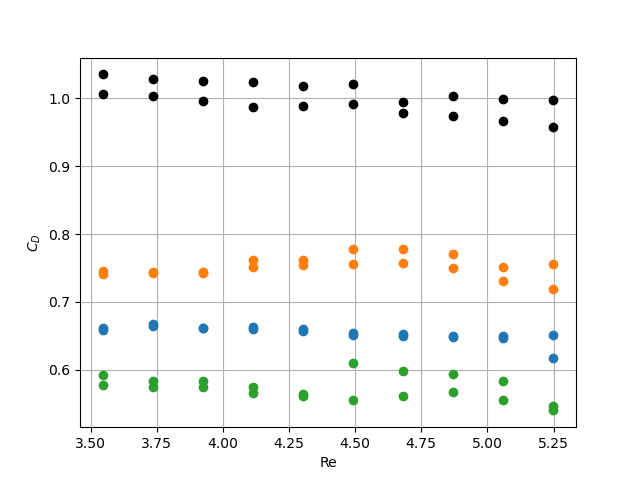

In [54]:
fig,ax = plt.subplots()


FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
FD_0 =  FD_s_referencia-F_soporte(U_s_referencia)
ax.plot(U_s_referencia,FD_0/U_s_referencia**2/Sf/rho/0.5,'ko')

FD_s_e1000_L075 = caso_e1000_L075.df['FD_m'][caso_e1000_L075.index_casos]
U_s_e1000_L075 = caso_e1000_L075.df['velocity'][caso_e1000_L075.index_casos]
FD_0 =  FD_s_e1000_L075-F_soporte(U_s_e1000_L075)
#ax.plot(U_s_e1000_L075*D/nu,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e1000_L075,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')


FD_s_e1000_L100 = caso_e1000_L100.df['FD_m'][caso_e1000_L100.index_casos]
U_s_e1000_L100 = caso_e1000_L100.df['velocity'][caso_e1000_L100.index_casos]
FD_0 =  FD_s_e1000_L100-F_soporte(U_s_e1000_L100)
#ax.plot(U_s_e1000_L075*D/nu,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')
#x.plot(U_s_e1000_L100,FD_0/U_s_e1000_L100**2/Sf/rho/0.5,'o')
#ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()
#ax.set_ylim([0.25,1.])
ax.set_ylabel('$C_D$')
ax.set_xlabel('Re');


FD_s_e1000_L125 = caso_e1000_L125.df['FD_m'][caso_e1000_L125.index_casos]
U_s_e1000_L125 = caso_e1000_L125.df['velocity'][caso_e1000_L125.index_casos]
FD_0 =  FD_s_e1000_L125-F_soporte(U_s_e1000_L125)
#ax.plot(U_s_e1000_L075*D/nu,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e1000_L125,FD_0/U_s_e1000_L125**2/Sf/rho/0.5,'o')

FD_s_e1000_L150 = caso_e1000_L150.df['FD_m'][caso_e1000_L150.index_casos]
U_s_e1000_L150 = caso_e1000_L150.df['velocity'][caso_e1000_L150.index_casos]
FD_0 =  FD_s_e1000_L150-F_soporte(U_s_e1000_L150)
#ax.plot(U_s_e1000_L075*D/nu,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e1000_L150,FD_0/U_s_e1000_L150**2/Sf/rho/0.5,'o')


# Estudio de Strouhal

Text(0.5, 0, 'Re')

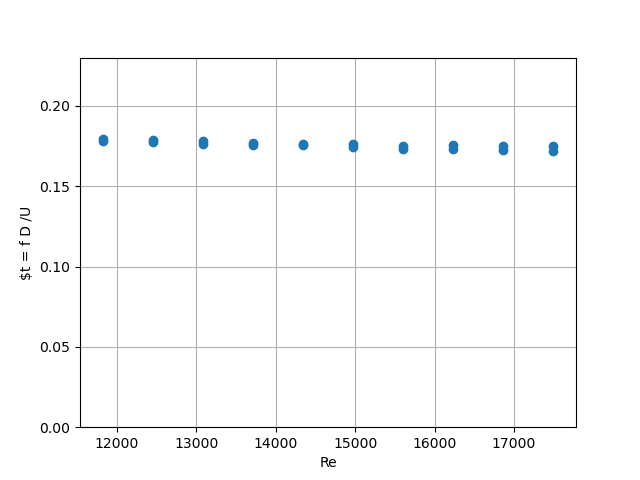

In [62]:
caso_referencia.freq_strouhal()
fr_strouhal_s = np.zeros_like(U_s_referencia)
for i,fr_st in enumerate(caso_referencia.strouhal_freq):
    fr_strouhal_s[i] = fr_st[0]
fig,ax = plt.subplots()
ax.plot(U_s_referencia*D/nu,fr_strouhal_s/U_s_referencia*D,'o')
ax.set_ylim([0,0.23]);
ax.grid()
ax.set_ylabel('$t = f D /U')
ax.set_xlabel('Re')

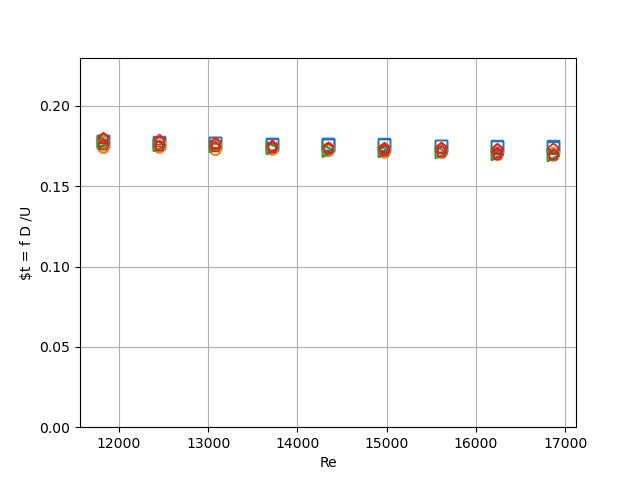

In [63]:
fig,ax = plt.subplots()
casos_e50 = [caso_e50_L075,caso_e50_L100,caso_e50_L125,caso_e50_L150]
for k,casoi in enumerate( casos_e50):
    casoi.freq_strouhal()
    U_si = casoi.df['velocity'][casoi.index_casos]
    fr_strouhal = np.zeros_like(U_si)
    for i,fr_st in enumerate(casoi.strouhal_freq):
        fr_strouhal[i] = fr_st[0]
    ax.plot(U_si*D/nu,fr_strouhal/U_si*D,marker=mks[k],
            linestyle='None',fillstyle='none',markersize=8)
    
ax.set_ylim([0,0.23]);
ax.grid()
ax.set_ylabel('$t = f D /U')
ax.set_xlabel('Re');









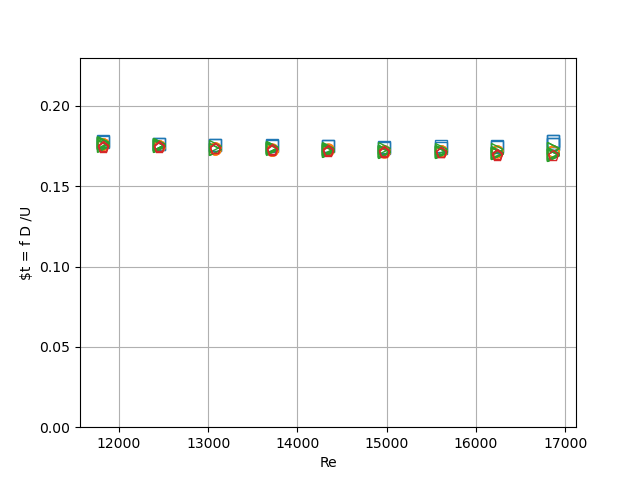

In [60]:
fig,ax = plt.subplots()
casos_e75 = [caso_e75_L075,caso_e75_L100,caso_e75_L125,caso_e75_L150]
for k,casoi in enumerate( casos_e75):
    casoi.freq_strouhal()
    U_si = casoi.df['velocity'][casoi.index_casos]
    fr_strouhal = np.zeros_like(U_si)
    for i,fr_st in enumerate(casoi.strouhal_freq):
        try:
            fr_strouhal[i] = fr_st[0]
        except IndexError:
            fr_strouhal[i] = 0
    ax.plot(U_si*D/nu,fr_strouhal/U_si*D,marker=mks[k],
            linestyle='None',fillstyle='none',markersize=8)
ax.set_ylim([0,0.23]);
ax.grid()
ax.set_ylabel('$t = f D /U')
ax.set_xlabel('Re');



In [42]:
prom_0

1e-323

In [ ]:
f_peak

In [ ]:
f_peak.size

Text(0.5, 0, 'Re')

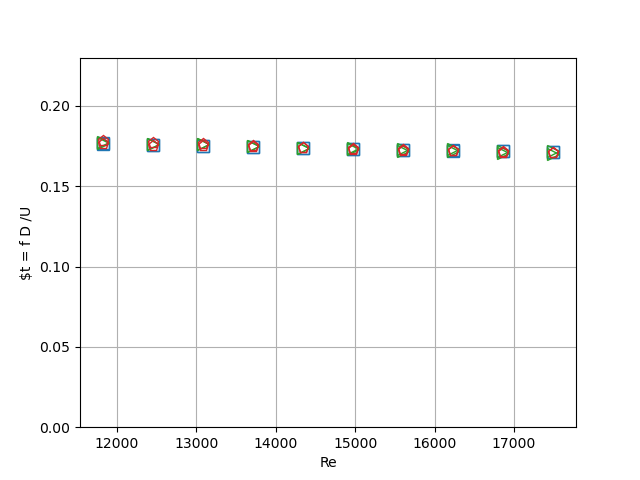

In [61]:
fig,ax = plt.subplots()
casos_e1000 = [caso_e1000_L075,caso_e1000_L100,caso_e1000_L125,caso_e1000_L150]
for k,casoi in enumerate( casos_e1000):
    casoi.freq_strouhal()
    U_si = casoi.df['velocity'][casoi.index_casos]
    fr_strouhal = np.zeros_like(U_si)
    for i,fr_st in enumerate(casoi.strouhal_freq):
        try:
            fr_strouhal[i] = fr_st[0]
        except IndexError:
            fr_strouhal[i] = 0
    ax.plot(U_si*D/nu,fr_strouhal/U_si*D,marker=mks[k],
            linestyle='None',fillstyle='none',markersize=8)
ax.set_ylim([0,0.23]);
ax.grid()
ax.set_ylabel('$t = f D /U')
ax.set_xlabel('Re')

In [ ]:
casoi.fft_filei(casoi.file)